# Setup

In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # wordcloud chart

from text_analysis import tokenize, STOP_WORDS

# Wordcloud: https://github.com/amueller/word_cloud
# Install mecab: https://pypi.org/project/mecab-python3/


def plot_wordcloud(tokens):
    font_path = './NotoSansCJKjp-Light.otf'
    text = ' '.join(tokens)
    # WordCloud needs a long sentence, each word separated by space
    wordcloud = WordCloud(background_color='white', font_path=font_path, max_font_size=40).generate(text)
    # Plot wordlcloud
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    
def tokenize_project_names(project_names):
    '''tokenize all project names.
    
    Inputs:
    -------
        list of project names
    
    Outputs:
    -------
        List of tokens
    '''
    tokens = []
    for name in project_names:
        tokens.extend(tokenize(name, stop_words=STOP_WORDS))
    return tokens

# Preprocess data

In [2]:
# Load data
df = pd.read_csv('./Python-try.csv')

In [3]:
# df is an object, type = pd.DataFrame
df.shape

(3210, 9)

In [4]:
df.head(20)

,通番号,公示年度,スキーム,分野,調査・事業名,提案法人名,代表法人所在地,外部人材（コンサルティング企業）,対象国
0,1.0,2013.0,ニーズ調査,その他,ポストハーベスト・ロス削減のための加圧加熱食品加工技術の移転に関するニーズ調査,一般社団法人北海道食産業総合振興機構、株式会社道銀地域総合研究所 共同企業体,北海道,-,インドネシア
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,バングラデシュ
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,モロッコ
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ヨルダン
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,2013.0,案件化調査（中小企業支援型）,環境・エネルギー,世界自然遺産ハロン湾における集めない・混ぜない・分離する“分散型排水処理システム”を活用した...,正和電工株式会社、株式会社長大 共同企業体,北海道,(なし),ベトナム
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.0,2013.0,案件化調査（中小企業支援型）,環境・エネルギー,携帯電話通信網を利用したリアルタイム・モニタリングシステム普及のための案件化調査,株式会社みどり工学研究所、株式会社かいはつマネジメント・コンサルティング 共同企業体,北海道,(なし),インドネシア
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(20)

,通番号,公示年度,スキーム,分野,調査・事業名,提案法人名,代表法人所在地,外部人材（コンサルティング企業）,対象国
3190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3191,NaN,2012.0,普及・実証・ビジネス化事業（中小企業支援型）,水の浄化・水処理,アラオア浄水場緩速ろ過池(生物浄化法)改善への普及・実証事業,福山商事株式会社,沖縄県,カーボンフリーコンサルティング株式会社,サモア
3192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195,NaN,2012.0,普及・実証・ビジネス化事業（中小企業支援型）,保健医療,Dr.カー(移動型診療所)展開に関する運行支援普及・実証事業,アクシオヘリックス株式会社,沖縄県,テクノロジーシードインキュベーション株式会社、株式会社エックス都市研究所,スーダン
3196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3199,NaN,2014.0,普及・実証・ビジネス化事業（中小企業支援型）,保健医療,超音波画像診断装置を活用した母子保健の向上に関する普及・実証事業,レキオ・パワー・テクノロジー株式会社,沖縄県,株式会社 エックス都市研究所,スーダン


In [6]:
df = df.dropna(how='all')

In [7]:
df.shape

(1404, 9)

In [8]:
df.head(20)

,通番号,公示年度,スキーム,分野,調査・事業名,提案法人名,代表法人所在地,外部人材（コンサルティング企業）,対象国
0,1.0,2013.0,ニーズ調査,その他,ポストハーベスト・ロス削減のための加圧加熱食品加工技術の移転に関するニーズ調査,一般社団法人北海道食産業総合振興機構、株式会社道銀地域総合研究所 共同企業体,北海道,-,インドネシア
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,バングラデシュ
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,モロッコ
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ヨルダン
5,2.0,2013.0,案件化調査（中小企業支援型）,環境・エネルギー,世界自然遺産ハロン湾における集めない・混ぜない・分離する“分散型排水処理システム”を活用した...,正和電工株式会社、株式会社長大 共同企業体,北海道,(なし),ベトナム
7,3.0,2013.0,案件化調査（中小企業支援型）,環境・エネルギー,携帯電話通信網を利用したリアルタイム・モニタリングシステム普及のための案件化調査,株式会社みどり工学研究所、株式会社かいはつマネジメント・コンサルティング 共同企業体,北海道,(なし),インドネシア
10,4.0,2017.0,案件化調査（中小企業支援型）,環境・エネルギー,遠隔モニタリング技術を活用した水力発電所の運用・保守高度化に関する案件化調査,株式会社ハイテックシステム,北海道,(なし),ラオス
13,5.0,2013.0,案件化調査（中小企業支援型）,廃棄物処理,廃バッテリーリサイクルおよび環境マネジメントシステム構築案件化調査,エバーグリーン株式会社、有限会社アイエムジー 共同企業体,北海道,(なし),ケニア
16,6.0,2019.0,案件化調査（中小企業支援型）,廃棄物処理,サバ州コタキナバル市廃タイヤ処理と廃タイヤチップ助燃剤による廃棄物処理にかかる案件化調査【5...,株式会社アクティー、株式会社廣和コーポレーション、西邦エンジニアリング株式会社 共同企業体,北海道,株式会社オリエンタルコンサルタンツグローバル,マレーシア
17,7.0,2019.0,案件化調査（中小企業支援型）,廃棄物処理,可燃廃棄物の代替燃料化を通した廃棄物削減・適正処理の案件化調査【アフリカ課題提示型】,有限会社タナベ,北海道,ブレインストームHR株式会社、ゴーインググリーン株式会社,エチオピア


In [9]:
df.tail(20)

,通番号,公示年度,スキーム,分野,調査・事業名,提案法人名,代表法人所在地,外部人材（コンサルティング企業）,対象国
3149,NaN,2013.0,案件化調査（中小企業支援型）,廃棄物処理,ベトナム国における廃棄物最終処分場浸出水処理技術適用可能性調査,株式会社シャイニーボールホールディングス、株式会社EJビジネス・パートナーズ、株式会社エイト...,沖縄県,(なし),ベトナム
3153,NaN,2014.0,案件化調査（中小企業支援型）,廃棄物処理,島嶼地域における環境に配慮した小型焼却炉の普及に向けた案件化調査,株式会社トマス技術研究所,沖縄県,株式会社沖縄エネテック、公益財団法人オイスカ,インドネシア
3155,NaN,2012.0,案件化調査（中小企業支援型）,水の浄化・水処理,サモア アピア近郊に再生可能エネルギーを使った沖縄・宮古島モデル案件化調査,福山商事株式会社、株式会社沖電システム、一般財団法人南西地域産業活性化センター 共同企業体,沖縄県,(なし),サモア
3165,NaN,2014.0,案件化調査（中小企業支援型）,水の浄化・水処理,汚濁水浄化処理装置の海外島しょ地域導入案件化調査,有限会社カワセツ,沖縄県,株式会社沖縄TLO、株式会社オオマエ、株式会社グローバル事業開発研究所,フィジー
3168,NaN,2016.0,案件化調査（中小企業支援型）,水の浄化・水処理,天然鉱物を使用した高濃度有機性排水・高塩分排水等の水質浄化に関する案件化調査,株式会社屋部土建,沖縄県,アイ・シー・ネット株式会社、株式会社万鐘,ベトナム
3171,NaN,2016.0,案件化調査（中小企業支援型）,水の浄化・水処理,海水淡水化装置を用いた住民向け飲料水の販売事業モデル構築のための案件化調査,ワイズグローバルビジョン株式会社,沖縄県,カーボンフリーコンサルティング株式会社、スリーランプス株式会社、アクセンチュア株式会社,パプアニューギニア
3174,NaN,2016.0,案件化調査（中小企業支援型）,農業,底面給水式植物工場による自然有機野菜の生産とフードバリューチェーン構築にかかる案件化調査,株式会社グリーンウインド、株式会社プラネット 共同企業体,沖縄県,カーボンフリーコンサルティング株式会社、一般財団法人日本国際協力システム、スリーランプス株式会社,ベトナム
3177,NaN,2012.0,案件化調査（中小企業支援型）,保健医療,Dr.カー(移動型診療所)の実施プロジェクト,アクシオヘリックス株式会社、テクノロジーシードインキュベーション株式会社、株式会社スマートエ...,沖縄県,(なし),スーダン
3181,NaN,2018.0,案件化調査（中小企業支援型）,防災・災害対策,日本式早期地震検知システムによる防災対策のための案件化調査【途上国発イノベーション枠】,レキオスソフト株式会社,沖縄県,株式会社オリエンタルコンサルタンツ,ペルー
3182,NaN,2013.0,普及・実証・ビジネス化事業（中小企業支援型）,環境・エネルギー,沖縄県中小企業が有する島嶼地域向け系統連系型太陽光発電システム導入技術の普及・実証事業,有限会社沖縄小堀電機,沖縄県,株式会社沖縄エネテック,ソロモン


In [10]:
df_agriculture = df[df['分野'] == '農業']

In [11]:
df_agriculture.shape

(280, 9)

In [12]:
df_agriculture.head()

,通番号,公示年度,スキーム,分野,調査・事業名,提案法人名,代表法人所在地,外部人材（コンサルティング企業）,対象国
21,11.0,2014.0,案件化調査（中小企業支援型）,農業,自走式ジャガイモ収穫機普及に向けた案件化調査,東洋農機株式会社,北海道,株式会社日本開発政策研究所,インド
24,12.0,2014.0,案件化調査（中小企業支援型）,農業,高生産性・高付加価値農業の実現のための案件化調査,株式会社旬喜野恵,北海道,株式会社地域計画センター,ラオス
27,13.0,2019.0,案件化調査（中小企業支援型）,農業,タイ東北部における「土づくり」を通じたサトウキビ、キャッサバの単収増加の為の案件化調査,スガノ農機株式会社,北海道,アイ・シー・ネット・アジア株式会社、アイ・シー・ネット株式会社,タイ
54,24.0,2014.0,普及・実証・ビジネス化事業（中小企業支援型）,農業,ジャガイモ収穫機普及に向けた普及・実証事業,東洋農機株式会社,北海道,株式会社日本開発政策研究所、インサイトマネジメント株式会社、株式会社オリエンタルコンサルタン...,インド
56,25.0,2018.0,普及・実証・ビジネス化事業（中小企業支援型）,農業,ベトナム国 旭川市・クアンニン省の都市間連携による農産加工能力及び商品開発能力向上にかかる普...,株式会社エフ・イー、旭川機械工業株式会社、農業生産法人株式会社谷口農場 共同企業体,北海道,【契約交渉中】,ベトナム


In [13]:
df_agriculture.tail()

,通番号,公示年度,スキーム,分野,調査・事業名,提案法人名,代表法人所在地,外部人材（コンサルティング企業）,対象国
3041,1296.0,2019.0,案件化調査（中小企業支援型）,農業,クラク省における地球畑方式を用いた1000年続く農業・農村開発のための案件化調査,有限会社かごしま有機生産組合,鹿児島県,【契約交渉中】,ベトナム
3128,NaN,2016.0,案件化調査（中小企業支援型）,農業,堆肥発酵促進剤を活用した耕畜連携の案件化調査,有限会社ワーコム農業研究所,山形県,アイ・シー・ネット株式会社,モンゴル
3131,NaN,2019.0,案件化調査（中小企業支援型）,農業,部分耕・不耕起播種機開発のための案件化調査,株式会社メタルプロダクツ、株式会社石井製作所 共同企業体,山形県,株式会社パデコ,モルドバ
3174,NaN,2016.0,案件化調査（中小企業支援型）,農業,底面給水式植物工場による自然有機野菜の生産とフードバリューチェーン構築にかかる案件化調査,株式会社グリーンウインド、株式会社プラネット 共同企業体,沖縄県,カーボンフリーコンサルティング株式会社、一般財団法人日本国際協力システム、スリーランプス株式会社,ベトナム
3204,NaN,2010.0,協力準備調査（BOPビジネス連携促進）,農業,バイオエタノール生産事業準備調査(BOPビジネス連携促進),株式会社アースノート、株式会社大和総研 共同企業体,沖縄県,-,ベトナム


In [14]:
agriculture_project_names = df_agriculture['調査・事業名'].dropna().tolist()

In [15]:
len(agriculture_project_names)

280

In [16]:
agriculture_project_names[:3]

['自走式ジャガイモ収穫機普及に向けた案件化調査',
 '高生産性・高付加価値農業の実現のための案件化調査',
 'タイ東北部における「土づくり」を通じたサトウキビ、キャッサバの単収増加の為の案件化調査']

In [17]:
agriculture_project_names[-3:]

['部分耕・不耕起播種機開発のための案件化調査',
 '底面給水式植物工場による自然有機野菜の生産とフードバリューチェーン構築にかかる案件化調査',
 'バイオエタノール生産事業準備調査(BOPビジネス連携促進)']

# Get top keywords in project names

In [18]:
tokens = tokenize_project_names(agriculture_project_names)

In [19]:
len(tokens)

4202

In [20]:
tokens[:10]

['自走', '式', 'ジャガイモ', '収穫', '機', '普及', '向け', '案件', '化', '調査']

In [21]:
# Unique tokens
set(tokens)

{'%',
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 '000',
 '1',
 '100',
 '1000',
 '3',
 '5',
 '6',
 'ALA',
 'ASEAN',
 'BOP',
 'Bubble',
 'CT',
 'FRP',
 'FSC',
 'IC',
 'ICT',
 'ISPS',
 'IT',
 'IoT',
 'LED',
 'MOCS',
 'Nguyen',
 'ODA',
 'PA',
 'PPP',
 'SDGs',
 'STEIN',
 'Tane',
 'Thai',
 'Yoi',
 'eco',
 '『',
 '』',
 '【',
 '】',
 'いちご',
 'おけ',
 'かかる',
 'きのこ',
 'くん',
 'こんにゃく',
 'さぬき',
 'しいたけ',
 'せり',
 'ため池',
 'たんぱく',
 'だし',
 'つい',
 'みつまた',
 'むけ',
 'よる',
 'る',
 'アイス',
 'アイメックシステム',
 'アグリ',
 'アグロフォレストリー',
 'アチェ',
 'アフリカ',
 'アミノ',
 'アルガン',
 'アンチ',
 'イチゴ',
 'イノベーション',
 'イモ',
 'イラワジ',
 'インキュベーション',
 'インディカ',
 'インデックス',
 'インド',
 'インドネシア',
 'インフラ',
 'イ草',
 'ウィルス',
 'ウッ',
 'ウニ',
 'エクアドル',
 'エスパルセット',
 'エタノール',
 'エネルギー',
 'エビ',
 'オイル',
 'オリーブ',
 'オーガニック',
 'カカオ',
 'カシュー',
 'カリマンタン',
 'ガ',
 'ガポックタン',
 'キヌア',
 'キビ',
 'キャッサバ',
 'キリン',
 'ク',
 'クアン',
 'クラウド',
 'クラブ',
 'クレジット',
 'クロン',
 'グリーン',
 'グループ',
 'グローバル',
 'ケース',
 'ゲアン',
 'ココナッツ',
 'コスト',
 'コミュニティ',
 'コメ',
 'コークス',
 'コーディネーション',
 'コーヒー',
 'コールド',
 'ゴマ',
 '

In [22]:
# Drop NA in tokens
tokens_notna = [token for token in tokens if token is not None]

In [23]:
len(tokens_notna)

4202

In [24]:
tokens_df = pd.DataFrame(Counter(tokens_notna).items(), columns=['Word', 'Frequency']).sort_values(['Frequency'], ascending=False)

In [25]:
tokens_df.to_csv('./tokens_df.csv', index=False)

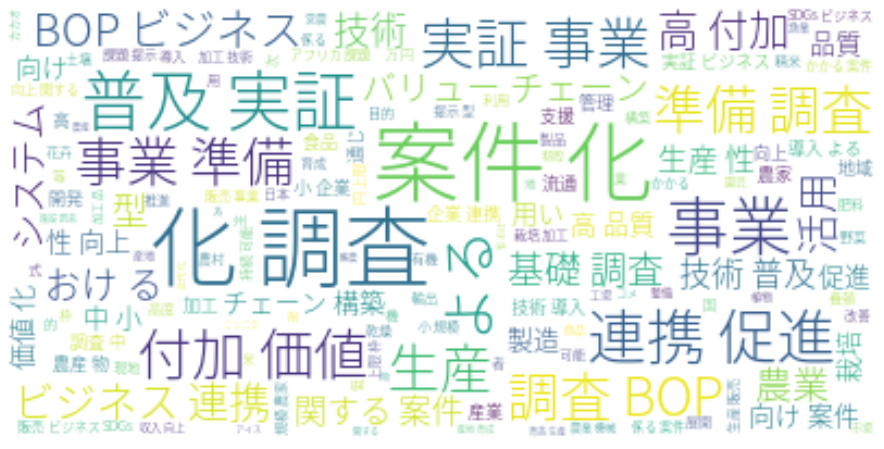

In [26]:
plot_wordcloud(tokens_notna)